---
title: Jupyter notebooks to markdown
description: using nbdev to convert notebooks to markdown
date: 2020-11-10
toc: true
tags:
- python
---

This is very meta, but since I only update notebooks once in a while, this here notebook converts all the notebooks in the folder to markdown files and images, which are used to build the blog posts on the site.

The main reason to do this is to save time when rebuilding the blog on github pages, as installing nbdev and converting all the notebooks takes a while.

Later on could add an option to the config to either build notebooks on each build or to just read the converted markdown files.


In [2]:
#collapse-hide
import os
from pathlib import Path
from nbdev.export2html import convert_md, notebook2html
from nbdev import export2html
import yaml

import khalido as ko # my helper utils

helper functions follow:

In [3]:
#collapse-hide
path_nb: Path = Path(".") # convert notebook is in the notebooks folder
path_md = path_nb / "markdown"

def make_folder(path, debug: bool = False):
    """makes parent folders if they don't exist for a path"""

    # assume the last thing is a file if there is a dot in the name
    if "." in path.name:
        path = path.parent

    try:
        path.mkdir(parents=True, exist_ok=False)
        if debug:
            print(f"{path} folder made")
    except FileExistsError:
        if debug:
            print(f"{path} folder already exists")
        pass

## nbdev

NBdev comes with a number of helpful extra features, so first up using that:

In [5]:
nb_paths = [
        f for f in path_nb.rglob("*.ipynb") if ".ipynb_checkpoints" not in str(f)
    ]
nb_paths

[Path('books.ipynb'),
 Path('convert2md.ipynb'),
 Path('quicksort.ipynb'),
 Path('flood_fill.ipynb'),
 Path('blogging_with_jupyter_notebooks.ipynb'),
 Path('pinboard.ipynb'),
 Path('monte_carlo_pi.ipynb'),
 Path('knn.ipynb'),
 Path('advent-of-code-2020.ipynb'),
 Path('covid_nsw_2021.ipynb'),
 Path('Advent-of-Code-2015.ipynb'),
 Path('monty_hall.ipynb')]

In [10]:
p = nb_paths[-1]
p.absolute()

Path('/Users/ko/code/blog/notebooks/monty_hall.ipynb')

In [18]:
export2html.notebook2html(p, dest="nbdev", template_file="fastpages.tpl", 
                          execute=False, force_all=True)

converting: monty_hall.ipynb


In [7]:
nb_paths = [
        f for f in path_nb.rglob("*.ipynb") if ".ipynb_checkpoints" not in str(f)
    ]

print(f"Converting {len(nb_paths)} notebooks to markdown files.")

for i, nb_path in enumerate(nb_paths):
    print(f"{i:3}: converting {nb_path}")
    path_img = path_md / f"{nb_path.stem}_files"
    make_folder(path_img) # make _files folder inside markdown output folder
    convert_md(nb_path, dest_path=path_md, img_path=None, jekyll=True)
    # remove extra empty files folder made by nbdev
    Path(path_img.stem).rmdir()

Converting 11 notebooks to markdown files.
  0: converting flood_fill.ipynb


AttributeError: 'MarkdownExporter' object has no attribute 'template_path'

So now in the markdown output folder we have a list of `.md` files, with each file having a `_files` folder containing output artifacts for that notebook.

In [10]:
os.listdir(path_md)

['monte_carlo_pi_files',
 'monty_hall.md',
 'flood_fill_files',
 'us_elections_2020_files',
 'convert2md.md',
 'Advent-of-Code-2015_files',
 'Advent-of-Code-2015.md',
 'knn_files',
 'quicksort_files',
 'blogging_with_jupyter_notebooks.md',
 'blogging_with_jupyter_notebooks_files',
 'knn.md',
 'monte_carlo_pi.md',
 'convert2md_files',
 'flood_fill.md',
 'us_elections_2020.md',
 'quicksort.md',
 'monty_hall_files']

## nbconvert

Nbconvert is usually pre-installed with jupyter notebook, so testing that out as well:

In [8]:
import nbformat
from nbconvert import MarkdownExporter

In [10]:
nb_paths = [
        f for f in path_nb.rglob("*.ipynb") if ".ipynb_checkpoints" not in str(f)
    ]

for nb_path in nb_paths:
    try:
        os.system(f'jupyter nbconvert --to markdown {nb_path} --output-dir markdown')
    except:
        print(f"failed to convert {nb_path}")
    
    print(f"converted {nb_path}")
    

converted flood_fill.ipynb
converted knn.ipynb
converted blogging_with_jupyter_notebooks.ipynb
converted Advent-of-Code-2015.ipynb
converted monty_hall.ipynb
converted pinboard.ipynb
converted advent-of-code-2020.ipynb
converted quicksort.ipynb
converted convert2md.ipynb
converted monte_carlo_pi.ipynb


In [58]:
md_exporter = MarkdownExporter(config=c)

In [53]:
resources["outputs"].keys()

dict_keys(['output_3_0.png', 'output_7_0.png', 'output_7_1.png', 'output_7_2.png', 'output_7_3.png', 'output_7_4.png', 'output_7_5.png', 'output_7_6.png', 'output_7_7.png', 'output_7_8.png', 'output_7_9.png', 'output_7_10.png'])

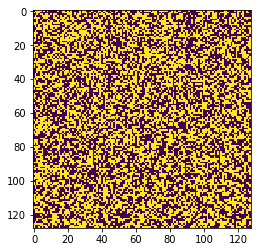

In [54]:
from IPython.display import Image
Image(data=resources['outputs']['output_3_0.png'], format='png')

In [57]:
from traitlets.config import Config
c = Config()
#c.HTMLExporter.preprocessors = ['nbconvert.preprocessors.ExtractOutputPreprocessor']
c.MarkdownExporter.preprocessors = ['nbconvert.preprocessors.ExtractOutputPreprocessor']
